## **Performance Metrics to evaluate text generating LLMs:**

- **Sentiment Analysis**

In this notebook, we essentially focus on the Sentiment Analysis performance metric (more about this on the readme.md file).

In [1]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 10.3 MB/s eta 0:00:00


In [25]:
# Import Libraries
import pandas as pd
from datasets import load_dataset
import random
import matplotlib.pyplot as plt

In [3]:
# Load the IMDb dataset from Hugging Face datasets
dataset = load_dataset("imdb")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised split:   0%|          | 0/50000 [00:00<?, ? examples/s]

In [12]:
# Select a subset of reviews and their labels
random_indices = random.sample(range(len(dataset['train'])), 10)
random_reviews = [dataset['train'][i]['text'] for i in random_indices]
random_labels = [dataset['train'][i]['label'] for i in random_indices]

# Convert label indices to actual labels
label_mapping = {
    0: 'Negative',
    1: 'Positive',
}
random_labels = [label_mapping[label] for label in random_labels]

In [13]:
df = pd.DataFrame({'Review': random_reviews, 'Ground_Truth_Label': random_labels})

### **From here: re-execute the code for the different Text Generative Models:**

In [14]:
testing_array = df['Review'].values
print(testing_array)
print(len(testing_array))

["This may not be a memorable classic, but it is a touching romance with an important theme that stresses the importance of literacy in modern society and the devastating career and life consequences for any unfortunate individual lacking this vital skill.<br /><br />The story revolves around Iris, a widow who becomes acquainted with a fellow employee at her factory job, an illiterate cafeteria worker named Stanley. Iris discovers that Stanley is unable to read, and after he loses his job, she gives him reading lessons at home in her kitchen. Of course, as you might predict, the two, although initially wary of involvement, develop feelings for each other...<br /><br />Jane Fonda competently plays Iris, a woman with problems of her own, coping with a job lacking prospects, two teenage children (one pregnant), an unemployed sister and her abusive husband. However, Robert DeNiro is of course brilliant in his endearing portrayal of the intelligent and resourceful, but illiterate, Stanley, 

**Query the text generating llm with the following prompt:** (copy the document as mentionned: PASTE_DOCUMENTS_HERE)

```
Please classify the following 10 sentences: positive, negative. Here are the sentences: PASTE_SENTENCES_HERE. please return the answers as an array
```

In [15]:
# Add the result
predicted_labels = ['Positive', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Positive', 'Negative', 'Negative', 'Positive']

predicted_labels_chat_gpt = ["Positive", "Negative", "Negative", "Positive", "Negative", "Negative", "Positive", "Negative", "Positive", "Negative" ]

predicted_labels_gemini = ["Positive", "Negative", "Negative", "Positive", "Negative", "Positive", "Negative", "Positive", "Positive", "Negative"]

predicted_labels_mistral = ["Positive", "Negative", "Negative", "Positive", "Negative", "Positive", "Negative", "Positive", "Negative", "Negative"]

predicted_labels_llama = ["Positive", "Negative", "Positive", "Negative", "Positive", "Negative", "Positive", "Negative", "Positive", "Negative"]

In [20]:
def evaluate_predictions(df, predicted_labels):
    # Add predicted labels to the DataFrame
    df['Predicted_Labels'] = predicted_labels

    # Calculate accuracy
    correct_predictions = sum(df['Ground_Truth_Label'] == df['Predicted_Labels'])
    total_reviews = len(df)
    accuracy = correct_predictions / total_reviews

    # Determine grade based on accuracy
    if accuracy >= 0.9:
        grade = 'A'
    elif accuracy >= 0.8:
        grade = 'B'
    elif accuracy >= 0.7:
        grade = 'C'
    elif accuracy >= 0.6:
        grade = 'D'
    else:
        grade = 'F'

    # Print results
    print("Total Score:", accuracy)
    print("Grade:", grade)
    print("\nDataFrame with 10 random reviews:")
    print(df.head(10))  # Print the first 10 rows of the DataFrame

    return accuracy

In [21]:
# Define predicted labels for each model
predicted_labels_all = [predicted_labels_chat_gpt, predicted_labels_gemini, predicted_labels_mistral, predicted_labels_llama]

# Define model names and sentiment accuracies
model_names = ["Chat GPT", "Gemini", "Mistral", "Llama"]

accuracies = []
# Iterate over each model and evaluate predictions
for model_name, predicted_labels in zip(names, predicted_labels_all):
    print(f"Evaluating {model_name} predictions:")
    accuracies.append(evaluate_predictions(df.copy(), predicted_labels))
    print()

Evaluating Chat GPT predictions:
Total Score: 0.5
Grade: F

DataFrame with 10 random reviews:
                                              Review Ground_Truth_Label  \
0  This may not be a memorable classic, but it is...           Positive   
1  One of the other commenters mentioned that the...           Negative   
2  I was too young to remmeber when I first saw t...           Positive   
3  I was never a big fan of horror movies. They u...           Positive   
4  Though this movie is cheesiness at its best, i...           Positive   
5  My husband and I were intrigued by the spectac...           Negative   
6  My comment is for the Russian version of Space...           Negative   
7  This has to be one of the best, if not the bes...           Positive   
8  Coinciding with the start of the baby boom, th...           Positive   
9  Dick Tracy was originally a comic book created...           Positive   

  Predicted_Labels  
0         Positive  
1         Negative  
2         Negativ

In [23]:
def save_sentiment_accuracy(model_name, accuracy, output_filename):
    # Create a DataFrame with the model name and sentiment accuracy
    new_data = {
        'model_name': [model_name],
        'sent_acc': [accuracy]
    }
    new_df = pd.DataFrame(new_data)

    # Save the DataFrame to a CSV file
    new_df.to_csv(output_filename, index=False)




# Iterate over each model and save sentiment accuracy
for model_name, accuracy in zip(model_names, accuracies):
    output_filename = f"{model_name.lower().replace(' ', '_')}_sentiment.csv"
    save_sentiment_accuracy(model_name, accuracy, output_filename)

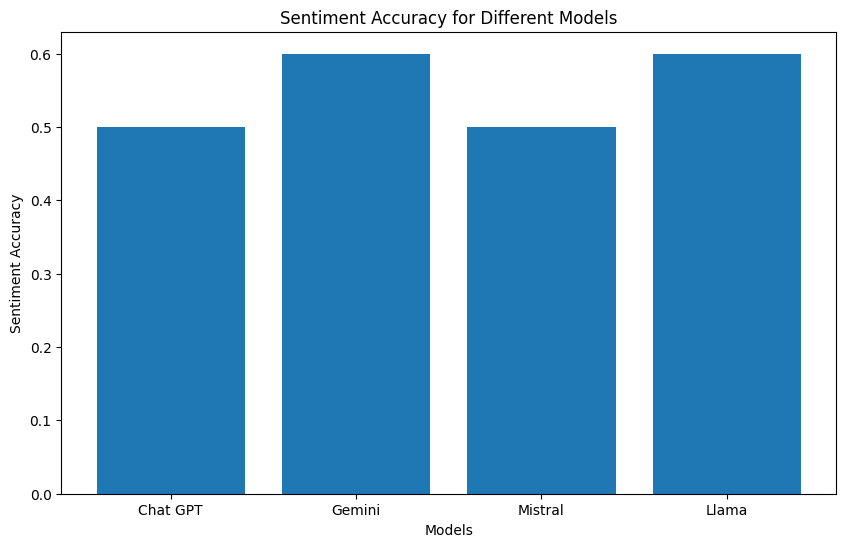

In [28]:
# Create bar plot
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies)

# Add labels and title
plt.xlabel('Models')
plt.ylabel('Sentiment Accuracy')
plt.title('Sentiment Accuracy for Different Models')

# Show plot
plt.show()

In [29]:
# Create a DataFrame with model names and sentiment accuracies
data = {'Model Name': model_names, 'Sentiment Accuracy': accuracies}
df_all = pd.DataFrame(data)

# Save the DataFrame to a CSV file
output_filename = "sentiment_accuracies_all.csv"
df_all.to_csv(output_filename, index=False)
